In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
data.drop_duplicates(inplace= True)
data.shape

(918, 12)

In [4]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
data.replace({'Age':0, 'RestingBP':0, 'Cholesterol':0, 'MaxHR':0}, np.nan, inplace= True)
# عدد 0 در این ستون ها به معنای عدم وجود داده میباشد

In [6]:
data.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
simple_imp = SimpleImputer(missing_values= np.nan, strategy= "mean")

In [9]:
data['Cholesterol'] = simple_imp.fit_transform(data[['Cholesterol']])

In [10]:
data['RestingBP'] = simple_imp.fit_transform(data[['RestingBP']])

In [11]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [12]:
data_heart_disease = data[data['HeartDisease'] == 1]
data_heart_disease

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140.0,207.0,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136.0,164.0,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140.0,234.0,0,Normal,140,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140.0,241.0,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1


In [13]:
data_sex = data_heart_disease.groupby('Sex').count()
data_sex

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Sex,,,,,,,,,,,
F,50,50,50,50,50,50,50,50,50,50,50
M,458,458,458,458,458,458,458,458,458,458,458


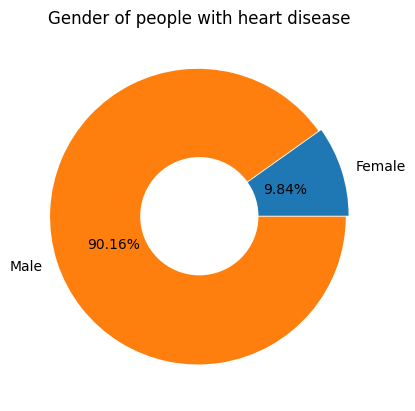

In [14]:
plt.pie(data_sex['HeartDisease'], labels= ['Female','Male'], autopct= '%.2f%%', explode=[0.01,0.01])
hole = plt.Circle((0, 0), 0.4, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Gender of people with heart disease')
plt.show()

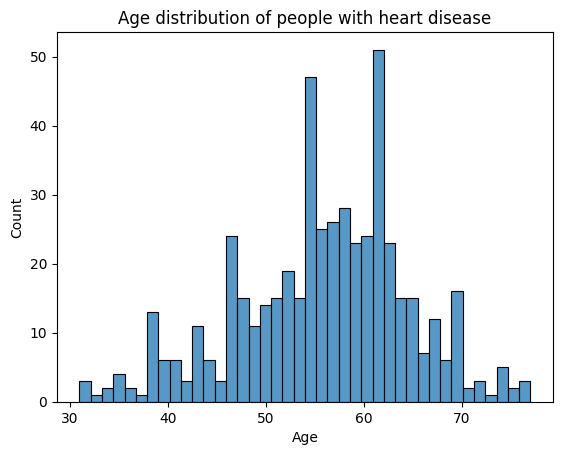

In [15]:
sns.histplot(data_heart_disease.Age ,bins=40)
plt.title('Age distribution of people with heart disease')
plt.show()

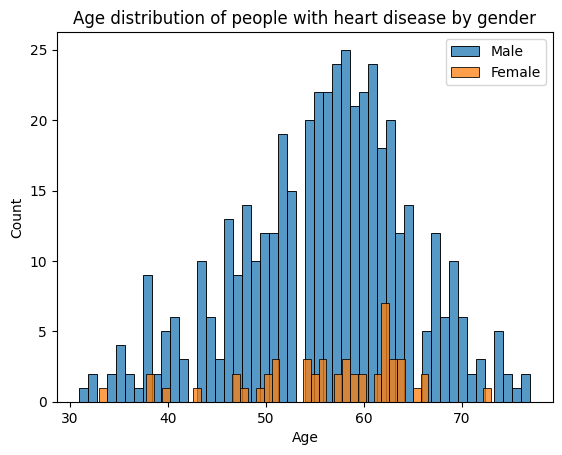

In [16]:
sns.histplot(data_heart_disease[data_heart_disease['Sex'] == 'M'].Age, bins=50, label='Male')
sns.histplot(data_heart_disease[data_heart_disease['Sex'] == 'F'].Age, bins=50, label='Female')
plt.title('Age distribution of people with heart disease by gender')
plt.legend()
plt.show()

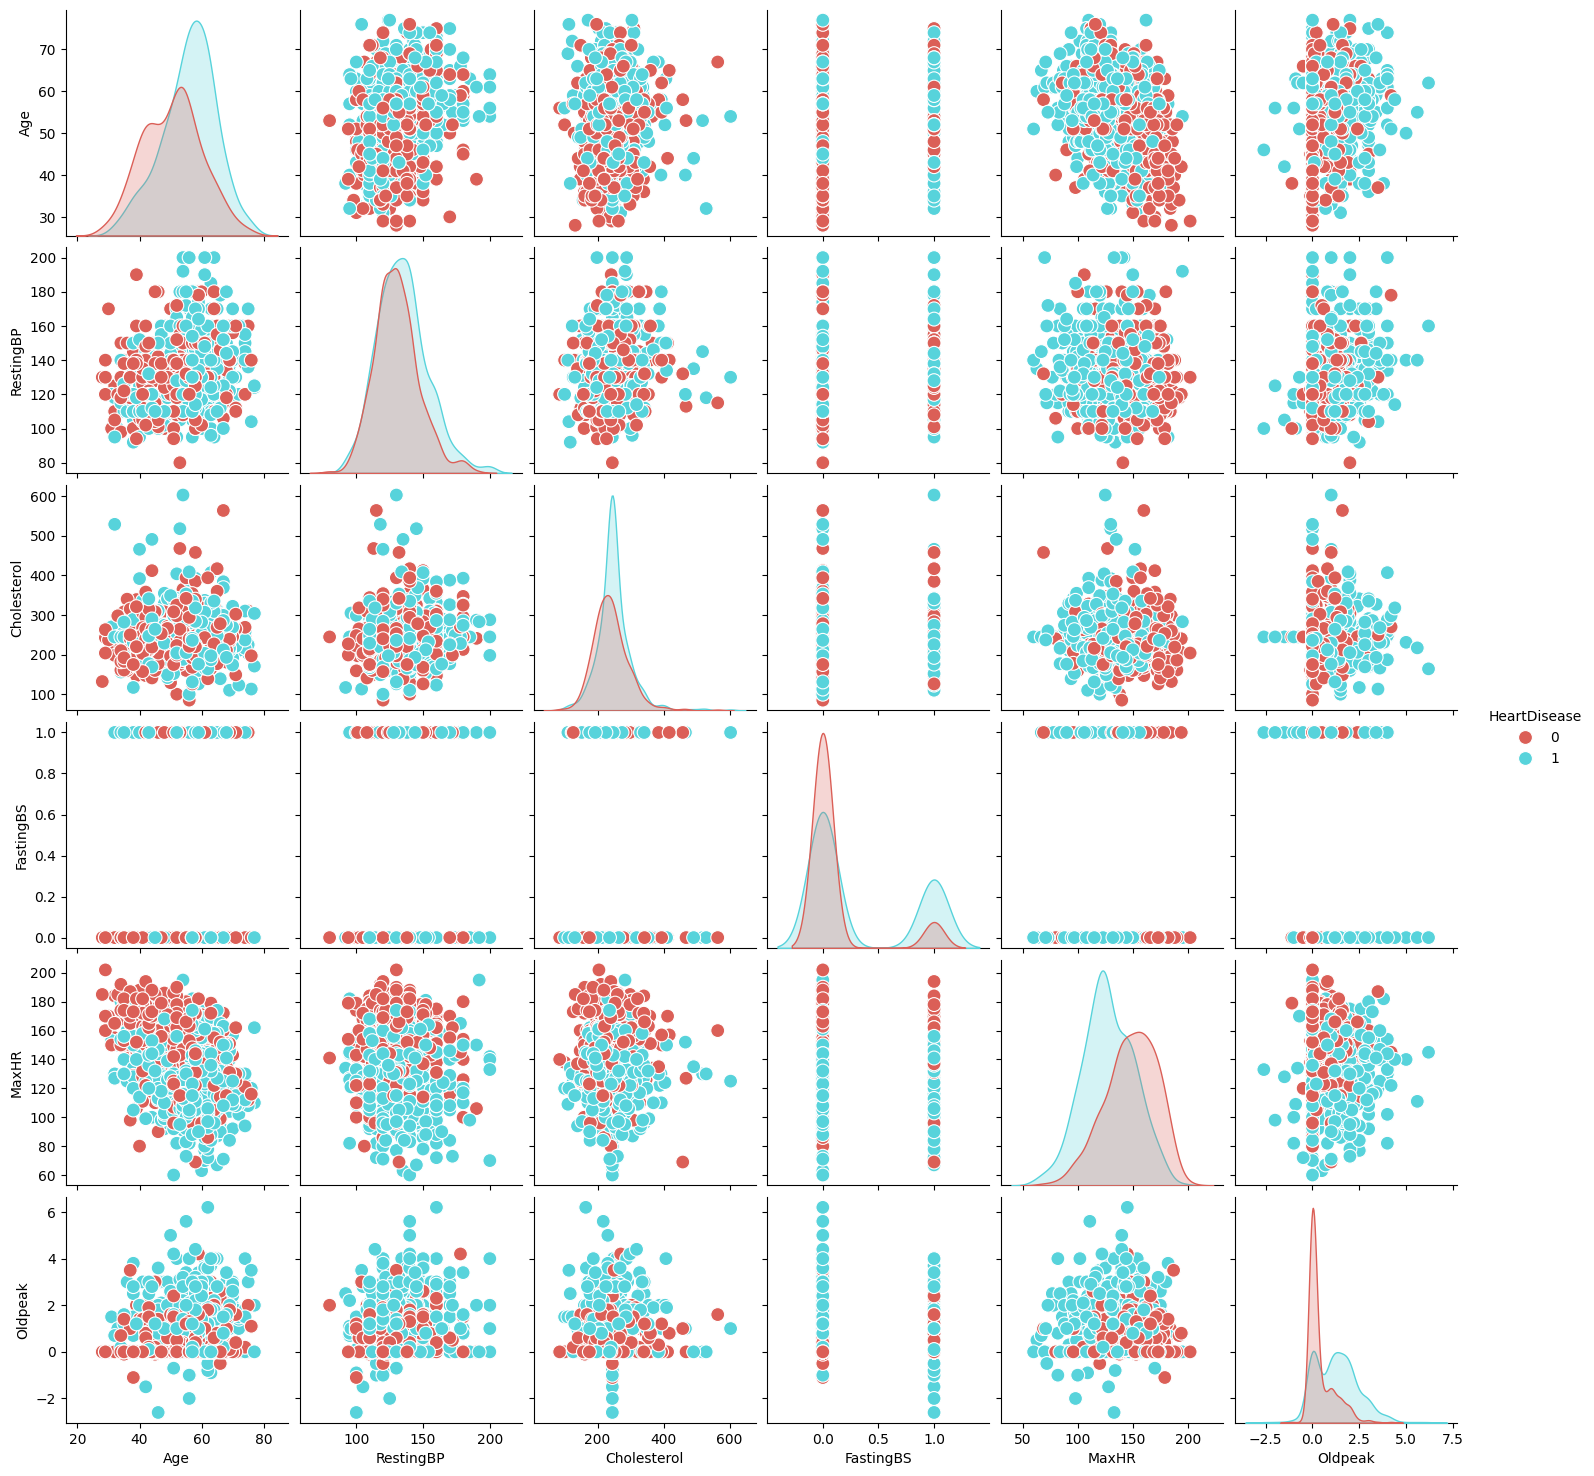

In [17]:
sns.pairplot(data,hue='HeartDisease',palette='hls',plot_kws={'s':100})
plt.show()

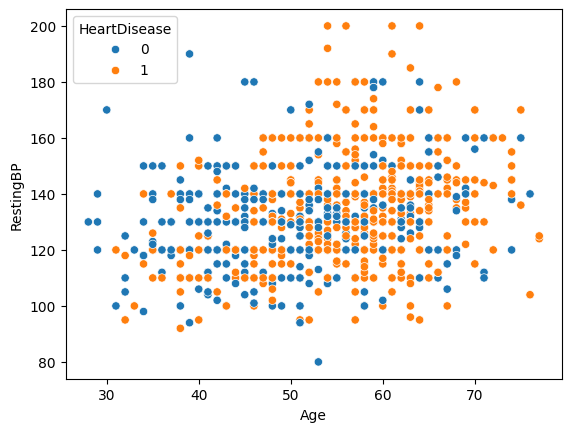

In [18]:
sns.scatterplot(x='Age', y='RestingBP', data=data , hue='HeartDisease')
plt.show()

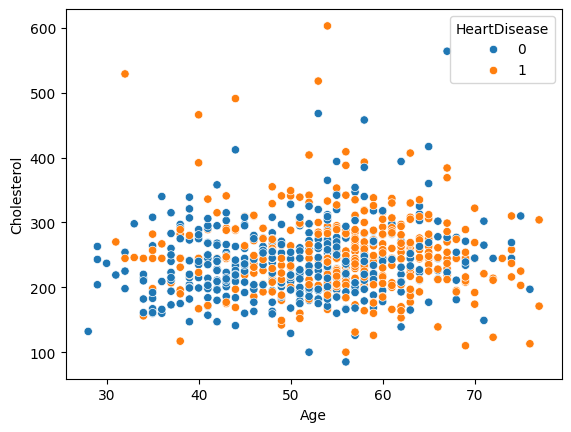

In [19]:
sns.scatterplot(x='Age', y='Cholesterol', data=data , hue='HeartDisease')
plt.show()

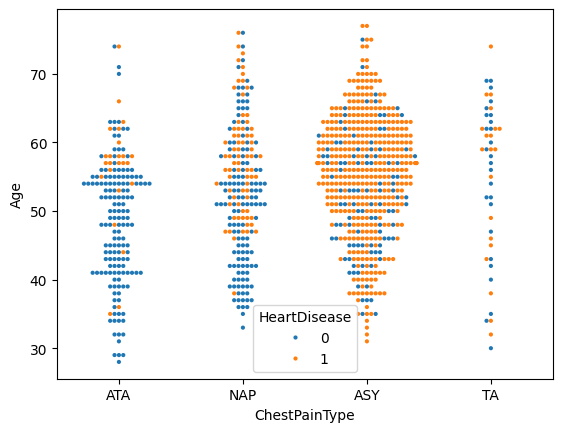

In [20]:
sns.swarmplot(y='Age', x='ChestPainType', data=data , hue= 'HeartDisease', size=3)
plt.show()

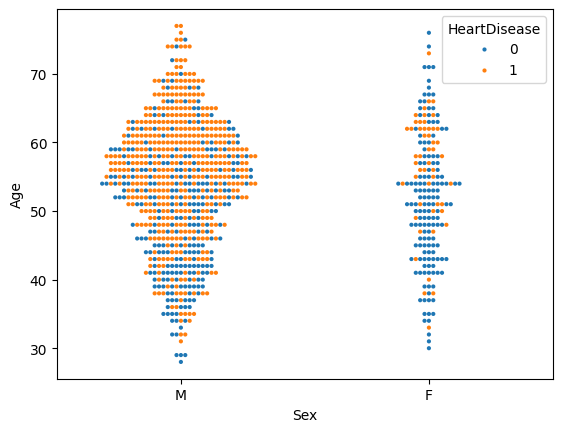

In [21]:
sns.swarmplot(y='Age', x='Sex', data=data , hue= 'HeartDisease', size=3)
plt.show()